# Tutorial 1: Parameter estimation using neural networks

This notebook implements parameter estimates by regressing simulated moments (predictors) against paramters (targets) using a multi-layer perceptron.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [3]:
from scipy.stats import gamma 
from scipy.stats import poisson
from scipy.stats import beta
from scipy.stats import moment

## Task 1: Transcription-degradation model

### 1.1 

Sample mean and variance of the Poisson distribution modelling transcript counts with Gamma prior

$$x \sim \text{Poisson} (p), \qquad p \sim \Gamma(1,1)$$

Split the data into test and training sets.

In [28]:
def poissonSampler(N=100):
    p = gamma.rvs(1,1) # <== fill in HERE
    return [p,np.mean(poisson.rvs(p, size=100)),np.var(poisson.rvs(p, size=N))]

df=pd.DataFrame(data=[poissonSampler() for _ in range(100)])

x = df.drop(0, axis=1)
y = df[0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

### 1.2 

Train an MLP and evaluate the resulting model on a test set (not used to train the model)  

In [29]:
trainX_scaled = trainX # scale if needed
testX_scaled  = testX

In [32]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam')
mlp_reg.fit(trainX_scaled,trainY) # <== fill in HERE

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=500)

In [33]:
y_pred = mlp_reg.predict(testX_scaled) # <== fill in HERE

### 1.3 

Visualise the performance of the estimator and compare it to the maximum likelihood estimator

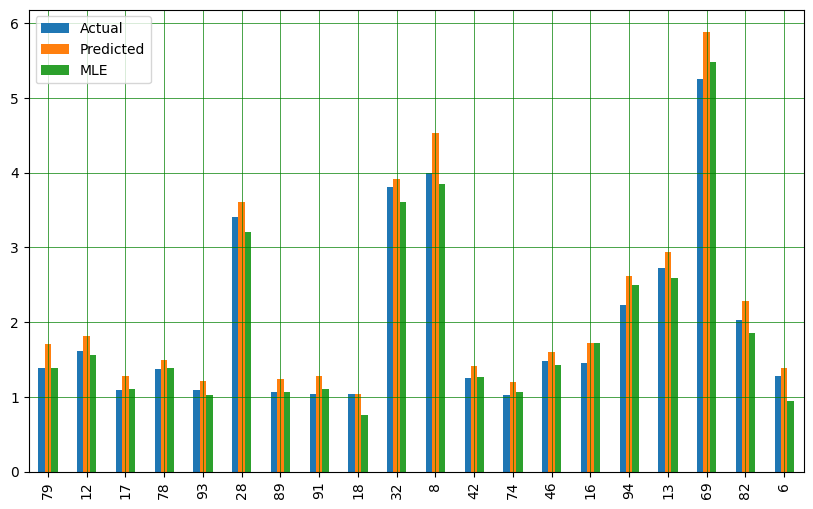

In [35]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred,'MLE': testX[1]}) # <== fill in HERE
df_temp.head()

df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Task 2: Telegraph model

### 1.1 

Sample the first three moments of telegraph model under the parameter distribution:

$$ k_1 \sim \Gamma(10,1), k_{on} \sim \Gamma(1,1), k_{off}=1  $$

Use 5,000 parameters genes and sample size of 100 cells.

In [36]:
def moment(data,p):
    return sum(np.array(data-np.mean(data))**p)/len(data)

def telegraphsampler(N=100) :
    ktx  = gamma.rvs(10, scale=1) # <== fill in HERE
    kon  = gamma.rvs(1, scale=1) # <== fill in HERE
    koff = 1
    data = [poisson.rvs(ktx*beta.rvs(kon,koff)) for _ in range(N)]

    return [kon, ktx, koff, moment(data,1), moment(data,2), moment(data,3)]

cells = [telegraphsampler() for _ in range(1000)]

### 1.2 

Split the data into training and test sets. Train an MLP on the training set and visualise its performance on the test set. For example, use a scatter of true vs. predicted parameters.

In [37]:
df=pd.DataFrame(data=cells)
x = df.drop([0,1], axis=1)  # <== fill in HERE
y = df[[0,1]]               # <== fill in HERE

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [38]:
trainX_scaled = trainX
testX_scaled = testX

In [39]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,100,50),
                       max_iter = 1000, activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY) # <== fill in HERE

MLPRegressor(hidden_layer_sizes=(150, 100, 100, 50), max_iter=1000)

In [41]:
y_pred = mlp_reg.predict(testX_scaled) # <== fill in HERE
df_temp = pd.DataFrame({'Actual': testY[1], 'Predicted': y_pred[:,1]})
df_temp.head()

,Actual,Predicted
424,5.482544,6.899903
55,7.756113,7.382624
600,10.063906,9.477067
346,12.186279,11.774297
940,7.496830,8.137539


In [ ]:
# <== plots HERE